In [3]:
# use Python 3.10.12

import re
import pandas as pd
import matplotlib.pyplot as plt


def update_dict(dict, key, value):
    if key in dict:
        dict[key] += value
    else:
        dict[key] = value


In [ ]:
texts_file_name = './data/texts.txt'

def get_text(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()

source_text = get_text(texts_file_name)
print(f'Loaded {texts_file_name} - length: {len(source_text)} lines, {len("".join(source_text))} characters')
    
# Loaded ./texts.txt - length: 762 lines, 69809 characters


Loaded ./data/texts.txt - length: 762 lines, 69809 characters


In [ ]:

def clean_text(text):
    cleaned_text = [re.sub(r'[^a-zA-Z]+', ' ', t).lower() for t in text]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

text = clean_text(source_text)

print(f'Text without punctuation and digits: {len(text)}')
print(f'\t{text[:100]}\n\t...\n\t{text[-100:]}')

space_count = text.count(' ')
print(f'Count of spaces: {space_count}, count of chars: {len(text) - space_count}')

# Text without punctuation and digits: 66917
# 	mi xidu na eskri yon ordinari lexi ji jandan jumle denpul eskri sen maxmo asan na doxo ji folki bant
# 	...
# 	ley cel ex baytu bwaw ji medisyen le ewreka te in parke ji nundin piu sen in baytu ji moyte sen hox 
# Count of spaces: 14128, count of chars: 52789


Text without punctuation and digits: 66917
	mi xidu na eskri yon ordinari lexi ji jandan jumle denpul eskri sen maxmo asan na doxo ji folki bant
	...
	ley cel ex baytu bwaw ji medisyen le ewreka te in parke ji nundin piu sen in baytu ji moyte sen hox 
Count of spaces: 14128, count of chars: 52789


In [ ]:
def get_words(text):
    return text.split()

all_words = get_words(text)
print(f'Total words count = {len(all_words)}')
print('First 10 words:', all_words[:10])
print('Last 10 words:', all_words[-10:])


# Total words count = 13138
# First 10 words: ['mi', 'xidu', 'na', 'eskri', 'yon', 'ordinari', 'lexi', 'ji', 'jandan', 'jumle']
# Last 10 words: ['ji', 'nundin', 'piu', 'sen', 'in', 'baytu', 'ji', 'moyte', 'sen', 'hox']

Total words count = 13138
First 10 words: ['mi', 'xidu', 'na', 'eskri', 'yon', 'ordinari', 'lexi', 'ji', 'jandan', 'jumle']
Last 10 words: ['ji', 'nundin', 'piu', 'sen', 'in', 'baytu', 'ji', 'moyte', 'sen', 'hox']


In [ ]:
def get_words_frequency(words):
    frequency = {}
    for word in words:
        update_dict(frequency, word, 1)
    return frequency

words_frequency = get_words_frequency(all_words)
print(f'Count of unique words = {len(words_frequency)}')

# Count of unique words = 1734

Count of unique words = 1734


In [ ]:
def print_words_stats(words_frequency):
    sorted_words = sorted(words_frequency.items(), key=lambda item: item[1], reverse=True)
    top_20_words = sorted_words[:20]
    print('Top 20 frequent words:', top_20_words)
    
    vowel_ending_words = {word: count for word, count in words_frequency.items() if word[-1] in 'aeiou'}
    unique_vowel_ending_words_count = len(vowel_ending_words)
    total_vowel_ending_words_count = sum(vowel_ending_words.values())

    print(f'Count of unique words ending with a vowel: {unique_vowel_ending_words_count}')
    print(f'Total count of words ending with a vowel: {total_vowel_ending_words_count}')

    consonant_ending_words = {word: count for word, count in words_frequency.items() if word[-1] not in 'aeiou'}
    unique_consonant_ending_words_count = len(consonant_ending_words)
    total_consonant_ending_words_count = sum(consonant_ending_words.values())

    print(f'Count of unique words ending with a consonant: {unique_consonant_ending_words_count}')
    print(f'Total count of words ending with a consonant: {total_consonant_ending_words_count}')
    
print_words_stats(words_frequency)

# Top 20 frequent words: [('na', 402), ('ji', 383), ('le', 381), ('sen', 379), ('mi', 354), ('te', 306), ('fe', 297), ('no', 203), ('hu', 185), ('to', 166), ('in', 138), ('cel', 136), ('yu', 135), ('am', 129), ('ete', 128), ('de', 128), ('ki', 124), ('da', 113), ('loga', 106), ('mas', 103)]
# Count of unique words ending with a vowel: 1194
# Total count of words ending with a vowel: 9249
# Count of unique words ending with a consonant: 540
# Total count of words ending with a consonant: 3889


Top 20 frequent words: [('na', 402), ('ji', 383), ('le', 381), ('sen', 379), ('mi', 354), ('te', 306), ('fe', 297), ('no', 203), ('hu', 185), ('to', 166), ('in', 138), ('cel', 136), ('yu', 135), ('am', 129), ('ete', 128), ('de', 128), ('ki', 124), ('da', 113), ('loga', 106), ('mas', 103)]
Count of unique words ending with a vowel: 1194
Total count of words ending with a vowel: 9249
Count of unique words ending with a consonant: 540
Total count of words ending with a consonant: 3889


In [ ]:
def get_chars_frequency(words):
    frequency = {}
    for word in words:
        for char in word:
            case_insensitive_char = char.lower()
            update_dict(frequency, case_insensitive_char, 1)
    return frequency

chars_frequency = get_chars_frequency(all_words)

def print_char_frequencies(chars_frequency):
    total_chars = sum(chars_frequency.values())
    print(f'Total characters count = {total_chars}')

    for char, count in sorted(chars_frequency.items(), key=lambda item: item[1], reverse=True):
        percentage = (count / total_chars) * 100
        print(f'{char}: {count}: {percentage:.2f}')
        
print_char_frequencies(chars_frequency)

# Total characters count = 52789
# a: 6601: 12.50
# e: 5259: 9.96
# i: 4679: 8.86
# o: 4100: 7.77
# n: 3747: 7.10
# u: 3108: 5.89
# l: 2928: 5.55
# m: 2750: 5.21
# s: 2543: 4.82
# t: 2376: 4.50
# r: 2120: 4.02
# k: 1709: 3.24
# d: 1499: 2.84
# y: 1477: 2.80
# b: 1125: 2.13
# h: 1058: 2.00
# f: 1004: 1.90
# p: 891: 1.69
# j: 860: 1.63
# x: 851: 1.61
# g: 804: 1.52
# w: 588: 1.11
# c: 439: 0.83
# v: 192: 0.36
# z: 81: 0.15



Total characters count = 52789
a: 6601: 12.50
e: 5259: 9.96
i: 4679: 8.86
o: 4100: 7.77
n: 3747: 7.10
u: 3108: 5.89
l: 2928: 5.55
m: 2750: 5.21
s: 2543: 4.82
t: 2376: 4.50
r: 2120: 4.02
k: 1709: 3.24
d: 1499: 2.84
y: 1477: 2.80
b: 1125: 2.13
h: 1058: 2.00
f: 1004: 1.90
p: 891: 1.69
j: 860: 1.63
x: 851: 1.61
g: 804: 1.52
w: 588: 1.11
c: 439: 0.83
v: 192: 0.36
z: 81: 0.15


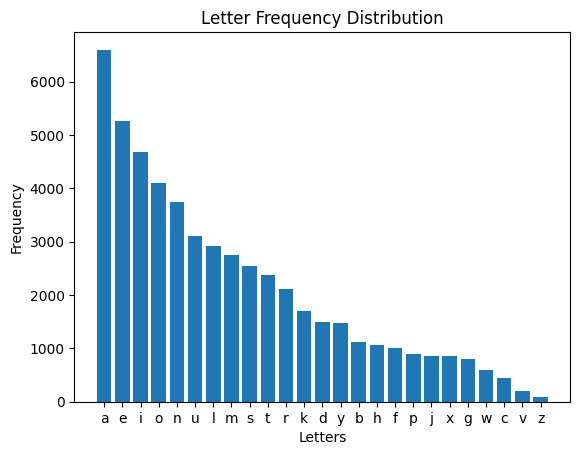

In [10]:
# pip install matplotlib


sorted_chars_frequency = sorted(chars_frequency.items(), key=lambda item: item[1], reverse=True)
letters = [item[0] for item in sorted_chars_frequency]
frequencies = [item[1] for item in sorted_chars_frequency]

# letters = list(chars_frequency.keys())
# frequencies = list(chars_frequency.values())

plt.bar(letters, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Letter Frequency Distribution')
plt.show()

In [11]:
possible_onsets = {
    'bl', 'fl', 'gl', 'kl', 'pl', 'vl',
    'br', 'dr', 'fr', 'gr', 'kr', 'pr', 'tr', 'vr',
    'bw', 'cw', 'dw', 'fw', 'gw', 'hw', 'jw', 'kw', 'lw', 'mw', 'nw', 'pw', 'rw', 'sw', 'tw', 'vw', 'xw', 'zw',
    'by', 'cy', 'dy', 'fy', 'gy', 'hy', 'jy', 'ky', 'ly', 'my', 'ny', 'py', 'ry', 'sy', 'ty', 'vy', 'xy', 'zy'
}

def all_consonants(string):
    return all(char not in 'aeiou' for char in string)

def hyphenation(word): 
    syllables = []
    # divide into parts by vowels
    current_syllable = ''
    for char in word:
        current_syllable += char
        if char in 'aeoui':
            syllables.append(current_syllable)
            current_syllable = ''
    if current_syllable:
        syllables.append(current_syllable)
    # append last coda if any
    try:
        if all_consonants(syllables[-1]):
            syllables[-2] += syllables[-1]
            syllables.pop()
    except IndexError:
        print(f'Error: {word} -> {syllables}')
        pass
    # break CCC into C-CC
    for i in range(1, len(syllables)):
        if len(syllables[i]) > 3 and all_consonants(syllables[i][:3]):
            syllables[i-1] += syllables[i][0]
            syllables[i] = syllables[i][1:]
    # break CCV into C-CV if CC is not allowed onset
    for i in range(1, len(syllables)):
        if len(syllables[i]) > 2 and all_consonants(syllables[i][:2]) and syllables[i][:2] not in possible_onsets:
            syllables[i-1] += syllables[i][0]
            syllables[i] = syllables[i][1:]
    return syllables
    # return '-'.join(syllables)

words = ['o', 'in', 'na', 'ata', 'bla', 'max', 'bala', 'pingo', 'patre', 'ultra', 'bonglu', 'aorta', 'bioyen']
for word in words:
    print(f'{word} -> {hyphenation(word)}')

# o -> ['o']
# in -> ['in']
# na -> ['na']
# ata -> ['a', 'ta']
# bla -> ['bla']
# max -> ['max']
# bala -> ['ba', 'la']
# pingo -> ['pin', 'go']
# patre -> ['pa', 'tre']
# ultra -> ['ul', 'tra']
# bonglu -> ['bon', 'glu']
# aorta -> ['a', 'or', 'ta']
# bioyen -> ['bi', 'o', 'yen']

o -> ['o']
in -> ['in']
na -> ['na']
ata -> ['a', 'ta']
bla -> ['bla']
max -> ['max']
bala -> ['ba', 'la']
pingo -> ['pin', 'go']
patre -> ['pa', 'tre']
ultra -> ['ul', 'tra']
bonglu -> ['bon', 'glu']
aorta -> ['a', 'or', 'ta']
bioyen -> ['bi', 'o', 'yen']


In [ ]:
def get_syllables_frequency(words_frequency):
    syllables_frequency = {}
    for word, freq in words_frequency.items():
        syllables = hyphenation(word)
        for syllable in syllables:
            update_dict(syllables_frequency, syllable, freq)
    return syllables_frequency

syllables_frequency = get_syllables_frequency(words_frequency)
print(f'Count of unique syllables = {len(syllables_frequency)}')
print('Top 20 frequent syllables:', sorted(syllables_frequency.items(), key=lambda item: item[1], reverse=True)[:20])

print()
consonant_ending_syllables = {syllable: count for syllable, count in syllables_frequency.items() if syllable[-1] not in 'aeiou'}
print(f'Count of unique syllables ending with a consonant: {len(consonant_ending_syllables)}')
print('Top 20 frequent syllables ending with a consonant:', sorted(consonant_ending_syllables.items(), key=lambda item: item[1], reverse=True)[:20])

print()
consonant_ending_frequency = {}
for syllable, count in consonant_ending_syllables.items():
    last_char = syllable[-1]
    update_dict(consonant_ending_frequency, last_char, count)

four_chars_syllables_frequency = {syllable: count for syllable, count in syllables_frequency.items() if len(syllable) >= 4}
print(f'Count of 4-chars syllables: {len(four_chars_syllables_frequency)}')
print('Top 20 frequent syllables with 4 chars:', sorted(four_chars_syllables_frequency.items(), key=lambda item: item[1], reverse=True)[:20])

# Count of unique syllables = 541
# Top 20 frequent syllables: [('te', 727), ('mi', 575), ('le', 558), ('na', 532), ('ji', 482), ('to', 465), ('sen', 420), ('su', 395), ('fe', 393), ('lo', 391), ('o', 387), ('ki', 378), ('a', 358), ('ha', 333), ('ka', 322), ('ma', 301), ('li', 298), ('mo', 295), ('ti', 285), ('de', 275)]

# Count of unique syllables ending with a consonant: 355
# Top 20 frequent syllables ending with a consonant: [('sen', 420), ('in', 230), ('den', 181), ('pul', 178), ('cel', 149), ('moy', 141), ('day', 135), ('am', 129), ('max', 108), ('tas', 107), ('mas', 103), ('yen', 102), ('ban', 90), ('bil', 88), ('es', 84), ('per', 81), ('hin', 78), ('mul', 77), ('hay', 74), ('yam', 71)]

# Count of 4-chars syllables: 43
# Top 20 frequent syllables with 4 chars: [('syon', 39), ('myaw', 32), ('plas', 22), ('swal', 21), ('bwaw', 20), ('syal', 18), ('fley', 13), ('plan', 12), ('nyum', 11), ('fron', 11), ('myen', 10), ('ryen', 9), ('syen', 9), ('kwan', 8), ('dwer', 8), ('nyan', 8), ('fran', 7), ('dyex', 6), ('kraw', 5), ('nyen', 5)]



Count of unique syllables = 541
Top 20 frequent syllables: [('te', 727), ('mi', 575), ('le', 558), ('na', 532), ('ji', 482), ('to', 465), ('sen', 420), ('su', 395), ('fe', 393), ('lo', 391), ('o', 387), ('ki', 378), ('a', 358), ('ha', 333), ('ka', 322), ('ma', 301), ('li', 298), ('mo', 295), ('ti', 285), ('de', 275)]

Count of unique syllables ending with a consonant: 355
Top 20 frequent syllables ending with a consonant: [('sen', 420), ('in', 230), ('den', 181), ('pul', 178), ('cel', 149), ('moy', 141), ('day', 135), ('am', 129), ('max', 108), ('tas', 107), ('mas', 103), ('yen', 102), ('ban', 90), ('bil', 88), ('es', 84), ('per', 81), ('hin', 78), ('mul', 77), ('hay', 74), ('yam', 71)]

Count of 4-chars syllables: 43
Top 20 frequent syllables with 4 chars: [('syon', 39), ('myaw', 32), ('plas', 22), ('swal', 21), ('bwaw', 20), ('syal', 18), ('fley', 13), ('plan', 12), ('nyum', 11), ('fron', 11), ('myen', 10), ('ryen', 9), ('syen', 9), ('kwan', 8), ('dwer', 8), ('nyan', 8), ('fran', 7),

In [13]:
print('Frequencies of consonants that appear as coda:')
for consonant, frequency in sorted(consonant_ending_frequency.items(), key=lambda item: item[1], reverse=True):
    print(f'{consonant}: {frequency}')

# Frequencies of consonants that appear as coda:
# n: 2244
# l: 948
# r: 840
# m: 563
# y: 548
# s: 537
# x: 196
# w: 140
# ...


Frequencies of consonants that appear as coda:
n: 2291
l: 966
r: 861
m: 574
y: 560
s: 555
x: 199
w: 152
f: 79
k: 27
h: 25
t: 12
j: 7
g: 2
c: 1
p: 1
b: 1


In [ ]:
print('\nFrequencies of last two characters in consonant-ending syllables:')
last_two_chars_frequency = {}
for syllable, count in consonant_ending_syllables.items():
    if len(syllable) >= 2:
        last_two_chars = syllable[-2:]
        update_dict(last_two_chars_frequency, last_two_chars, count)

for chars, frequency in sorted(last_two_chars_frequency.items(), key=lambda item: item[1], reverse=True):
    print(f'{chars}: {frequency}')


# Frequencies of last two characters in consonant-ending syllables:
# en: 883
# in: 458
# an: 431
# on: 327
# er: 318



Frequencies of last two characters in consonant-ending syllables:
en: 883
in: 458
an: 431
on: 327
er: 318
ay: 310
ul: 307
am: 297
as: 271
il: 212
ar: 209
un: 192
al: 175
el: 169
or: 162
oy: 149
es: 133
aw: 129
ax: 123
om: 115
ur: 113
os: 106
ol: 103
ey: 101
im: 80
ir: 59
of: 57
um: 45
is: 39
em: 37
ux: 28
ex: 24
ew: 21
ox: 16
oh: 12
ak: 11
ot: 11
uf: 11
uk: 9
ix: 8
eh: 7
aj: 7
us: 6
ah: 6
af: 5
if: 5
ek: 3
ok: 2
ik: 2
ag: 2
ow: 2
oc: 1
ef: 1
op: 1
ab: 1
at: 1


In [ ]:
print('\nFrequencies of onset consonant clusters:')
first_two_consonants_frequency = {}
onset_frequency = {}
for syllable, count in syllables_frequency.items():
    if len(syllable) >= 2 and all_consonants(syllable[:2]):
        first_two_consonants = syllable[:2]
        update_dict(first_two_consonants_frequency, first_two_consonants, count)
        update_dict(onset_frequency, first_two_consonants, count)
    elif all_consonants(syllable[:1]):
        update_dict(onset_frequency, syllable[:1], count)

# for consonants, frequency in sorted(first_two_consonants_frequency.items(), key=lambda item: (item[0][1], item[1]), reverse=True):
#     print(f'{consonants}: {frequency}')

# transform dict to csv format
clusters_csv = {}
for consonants, frequency in first_two_consonants_frequency.items():
    first = consonants[0]
    second = consonants[1]
    if first not in clusters_csv:
        clusters_csv[first] = {}
    clusters_csv[first][second] = frequency
    onset_frequency[first] = onset_frequency.get(first, 0) + frequency
    
print(" ,\tl,\tr,\tw,\ty")
for first, stats in clusters_csv.items():
    print(f"{first},\t{stats.get('l', '')},\t{stats.get('r', '')},\t{stats.get('w', '')},\t{stats.get('y', '')}")


# Frequencies of onset consonant clusters:
#  ,	l,	r,	w,	y
# k,	31,	95,	36,	4
# t,	,	108,	,	11
# s,	,	,	63,	80
# l,	,	,	18,	29
# n,	,	,	54,	79



Frequencies of onset consonant clusters:
 ,	l,	r,	w,	y
k,	31,	95,	36,	4
t,	,	108,	,	11
s,	,	,	63,	80
l,	,	,	18,	29
n,	,	,	54,	79
p,	101,	60,	,	4
b,	62,	20,	20,	3
g,	28,	8,	8,	15
c,	,	,	2,	3
r,	,	,	1,	19
d,	,	57,	10,	16
f,	21,	35,	,	
m,	,	,	,	53
x,	,	,	10,	6
v,	,	,	,	6
h,	,	,	2,	
j,	,	,	1,	


In [ ]:

print('\nFrequencies of all onsets:')
for consonant, frequency in sorted(onset_frequency.items(), key=lambda item: item[1], reverse=True):
    print(f'{consonant}: {frequency}')

# Frequencies of all onsets:
# t: 2245
# m: 2123
# s: 1845
# l: 1672
# k: 1516
# d: 1416
# n: 1323
# h: 1031
# b: 1019
# f: 869
# r: 856
# j: 852
# g: 743
# p: 725


Frequencies of all onsets:
t: 2245
m: 2123
s: 1845
l: 1672
k: 1516
d: 1416
n: 1323
h: 1031
b: 1019
f: 869
r: 856
j: 852
g: 743
p: 725
x: 636
y: 589
c: 433
w: 211
v: 186
tr: 108
pl: 101
kr: 95
z: 81
sy: 80
ny: 79
sw: 63
bl: 62
pr: 60
dr: 57
nw: 54
my: 53
kw: 36
fr: 35
kl: 31
ly: 29
gl: 28
fl: 21
br: 20
bw: 20
ry: 19
lw: 18
dy: 16
gy: 15
ty: 11
dw: 10
xw: 10
gw: 8
gr: 8
xy: 6
vy: 6
py: 4
ky: 4
cy: 3
by: 3
hw: 2
cw: 2
rw: 1
jw: 1
